<a href="https://colab.research.google.com/github/Sergio-Rosales-Soria/DS-II/blob/main/Entregable_Final_DSII_RosalesVF(RS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

**Contexto y Audiencia**

Contexto:
El mercado de autos usados presenta un desafío significativo para los compradores: determinar si el precio de un vehículo es justo.

A menudo, los compradores carecen de información completa sobre las condiciones del automóvil, lo que, junto con la flexibilidad y fluctuación en la valoración de los autos usados, genera incertidumbre.

Este informe tiene como objetivo analizar las ventas de autos usados ​​en Estados Unidos, centrando el estudio en características clave como el modelo, año de fabricación, condición del vehículo, ubicación de venta y datos demográficos de los compradores. A través de este análisis, se busca identificar patrones de comportamiento en el mercado y evaluar si estos influyen en los valores de venta, con el objetivo final de determinar si es posible predecir estos valores.

Audiencia:
Este análisis intenta contestar, con evidencia, las preguntas del párrafo anterior. Esta apuntado principalmente para ejecutivos de operaciones de vehículos usados, pero es de  utilidad para cualquier usuario que dese adquirir un vehículo usado o personas iniciándose en programación/ciencia de datos.

**Hipotesís**

Hipotesis principal:
- Los modelos mas nuevos son mas costosos.
- Los modelos en mejores condiciones son mas costosos.
- Existen ciertas marcas y modelos que pese a su atigÜedad y condicion podrian mantener un alto valor (outliers a considerar en el modelo).

Otras hipotsis de interes:
- En ciertos estados con mayor poder adquisitivo, se paga mas por el mismo modelo.
- Los sujetos masculinos compran autos mas costosos.
- Los sujetos de mayor edad compran autos mas costosos.

**Objetivo**

El objetivo principal del proyecto es desarrollar un modelo de machine learning que pueda predecir con precisión el precio de un automovil basándose en diversas características tecnicas de la unidad y repecto de la ubicacion del local de ventas.

Para lograr este objetivo, podríamos utilizar un enfoque de aprendizaje supervisado utilizando metodos de Regresion Lineal, podriamos tambien probar otros como KNN o Random Forest.

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
from wordcloud import WordCloud

**Configuración del entorno de Python en Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "drive/My Drive/Data Science I/datasets"

Mounted at /content/drive
/content/drive/My Drive/Data Science I/datasets


**Lectura del dataset**

In [ ]:
df_autos = pd.read_excel('Ventas de automoviles.xlsx')

**Análisis inicial del dataset**

In [ ]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165576 entries, 0 to 165575
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FACTURA           165576 non-null  int64         
 1   NUMERO_CHASIS     165576 non-null  int64         
 2   ID_MODELO         165576 non-null  int64         
 3   MARCA             165576 non-null  object        
 4   MODELO            165576 non-null  object        
 5   LINEA             165576 non-null  object        
 6   ID_CARROCERIA     165576 non-null  int64         
 7   CARROCERIA        165576 non-null  object        
 8   ID_TRANSMISION    165576 non-null  int64         
 9   TRANSMISION       165576 non-null  object        
 10  ID_CONDICION      165576 non-null  int64         
 11  CONDICION         165576 non-null  object        
 12  ID_COLOR          165576 non-null  int64         
 13  COLOR_EXT         165576 non-null  object        
 14  KILO

In [ ]:
df_autos.head()

,FACTURA,NUMERO_CHASIS,ID_MODELO,MARCA,MODELO,LINEA,ID_CARROCERIA,CARROCERIA,ID_TRANSMISION,TRANSMISION,...,ID_COMPADOR,SEXO,EDAD,ID_SUCURSAL,SUCURSAL,ID_ESTADO,ABREVIATURA,ESTADO,PRECIO_DE_VENTA,FECHA_DE_VENTA
0,1011001,20000001,601001,Kia,Sorento,LX,10007,SUV,901,automatic,...,18192269,F,18,401001,KIA MOTORS AMERICA INC,501004,CA,California,21500,2023-12-14
1,1011002,20000002,601001,Kia,Sorento,LX,10007,SUV,901,automatic,...,32230021,F,63,401001,KIA MOTORS AMERICA INC,501004,CA,California,21500,2023-11-14
2,1011003,20000006,601005,Nissan,Altima,2.5 S,10005,Sedan,901,automatic,...,21566794,M,62,401004,ENTERPRISE VEHICLE EXCHANGE / TRA / RENTAL / T...,501004,CA,California,10900,2023-07-28
3,1011004,20000011,601010,Audi,A6,3.0T Prestige quattro,10005,Sedan,901,automatic,...,12798535,M,78,401005,AUDI MISSION VIEJO,501004,CA,California,49750,2023-08-14
4,1011005,20000016,601005,Nissan,Altima,2.5 S,10005,Sedan,901,automatic,...,20814757,M,48,401004,ENTERPRISE VEHICLE EXCHANGE / TRA / RENTAL / T...,501004,CA,California,14100,2023-09-21


**Descripción de variables**

**Factura:** Documento que detalla la venta de un vehículo. Valor no nulo e irrepetibe.

**Número de chasis:** Identificación única del chasis del vehículo, utilizado para distinguir un automóvil específico de otros en la base de datos.

**ID Comprador:** Identificación única del comprador del vehículo, utilizado para rastrear las transacciones y la información del cliente.

**Precio de venta:** Monto monetario por el cual se vendió el vehículo al comprador.

**Fecha de venta:** Fecha en la que se realizó la transacción de venta del vehículo.

**Kilometraje:** Distancia recorrida por el vehículo, utilizado para determinar su estado y valor.

**Año de fabricación:** Año en que se fabricó el vehículo vendido.

**Sexo:** Género del comprador del vehículo.

**Edad:** Edad del comprador del vehículo.

**Sucursal:** Localización física donde se llevó a cabo la transacción de venta del vehículo.

**Abreviatura:** Forma corta de representar el estado.

**Estado:** Estado en donde se realizo la venta.

**Marca:** Empresa fabricante del vehículo.

**Modelo:** Nombre específico del modelo del vehículo.

**Línea:** Subcategoría o variante del modelo del vehículo.

**Condición:** Estado general del vehículo, ya sea nuevo, usado, en buenas condiciones, etc.

**Color exterior:** Color de la pintura del exterior del vehículo.

**Transmisión:** Tipo de transmisión del vehículo, ya sea automática o manual.

**Carrocería:** Tipo de estructura del vehículo, como sedán, camioneta, SUV, etc.

In [ ]:
df_autos.dtypes.value_counts()

,count
int64,14
object,11
datetime64[ns],1


# **Data Wrangling: Limpieza y transformación de datos**

**Valores duplicados**

In [ ]:
df_autos.duplicated().sum()

0

**Valores nulos**

In [ ]:
df_autos.isnull().sum()

,0
FACTURA,0
NUMERO_CHASIS,0
ID_MODELO,0
MARCA,0
MODELO,0
LINEA,0
ID_CARROCERIA,0
CARROCERIA,0
ID_TRANSMISION,0
TRANSMISION,0


**Valores outliers**

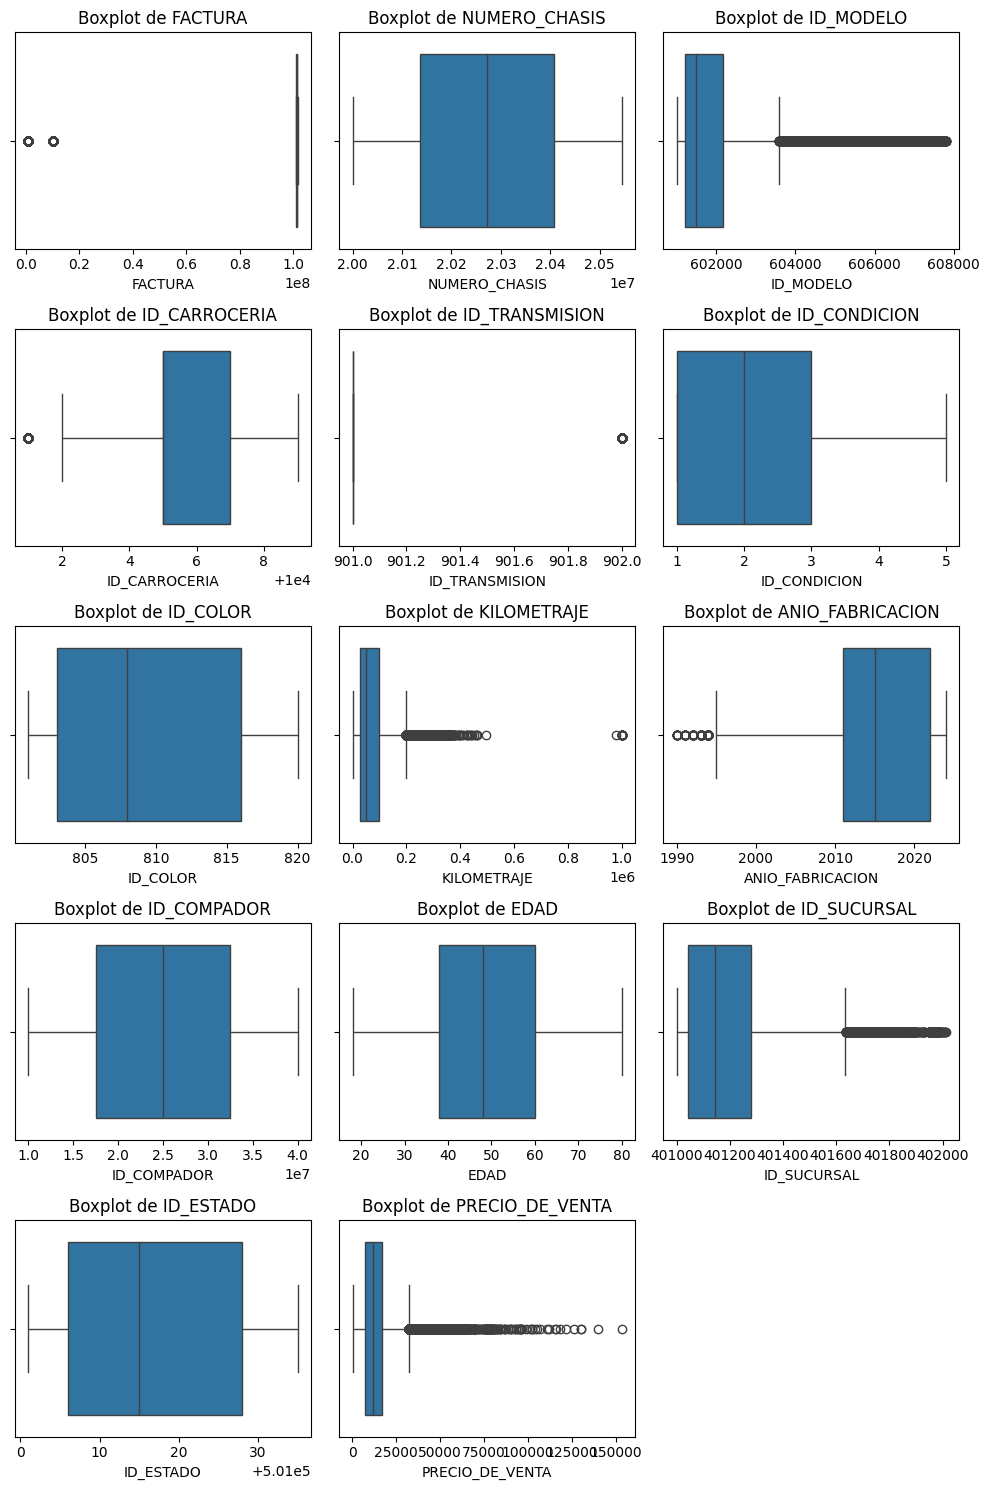

In [ ]:
numeric_columns = df_autos.select_dtypes(include=['int64', 'float64'])
# Calcular el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 3*num_rows))

# Generar y mostrar los diagramas de caja para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=df_autos[col])
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()


**Conclusion de limpieza de datos**
No se identificaron valores nulos ni valores duplicados, sin embargo se identificaron gran cantidad de valores outliers. Muchos de ellos, como ID_MODELO o ID_SUCURSAL, seran eliminados en la etapa de preprocesameinto de datos, por ser variables que no aportan al modelo. Otros como PRECIO_DE_VENTA o KILOMETRAJE son variables en las que entedemos que los valores outlier son calves para entender el comportamiento del dataset.

Por otra parte, cabe destacar, que la gran mayoria de los datos numericos corresponden al codigos de ID de una variable categorica, con lo cual seran suprimiedos mas adelante para el armado del modelo, para no generar desvio por la odinalidad de estos datos. Por otra parte, se debera hacer un analisis de que variables categoricas conviene dejar en el modelo, en fucion a la cantidad de valores diferentes, dado que se deberan conventir mediante get_dummies.

# **EDA: Análisis Exploratorio de datos**

###Analisis de Metadata

In [ ]:
#uno todas las marcas y modelos en un solo string
text_combined = " ".join(f"{marca} {modelo}" for marca, modelo in zip(df_autos['MARCA'], df_autos['MODELO']))


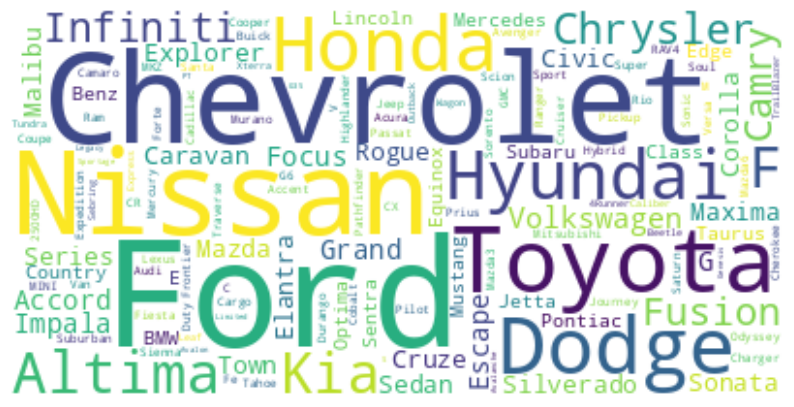

In [ ]:
# Creo una nube de palabras
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text_combined)

# muestro la nube de palabras
plt.figure(figsize = (10,10))
plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

###Análisis exploratorio

**1.- Los modelos mas nuevos son mas costosos?**

<Axes: xlabel='ANIO_FABRICACION', ylabel='PRECIO_DE_VENTA'>

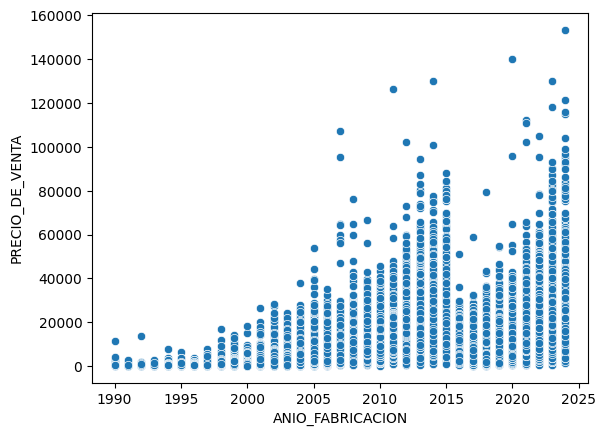

In [ ]:
# Correlacion Precio - Año de fabricacion
sns.scatterplot(data=df_autos, x="ANIO_FABRICACION", y="PRECIO_DE_VENTA")

<Axes: xlabel='KILOMETRAJE', ylabel='PRECIO_DE_VENTA'>

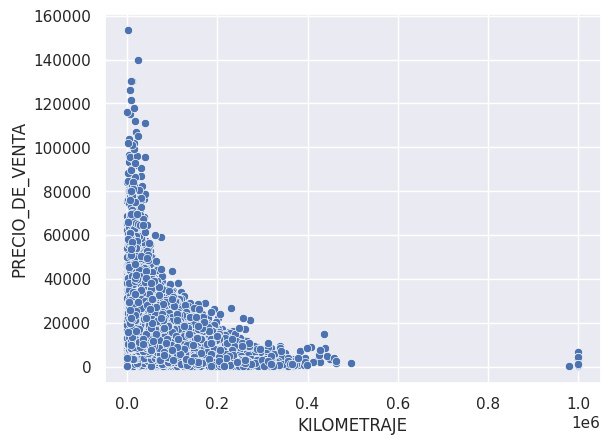

In [ ]:
# Correlacion Precio - Kilometraje
sns.scatterplot(data=df_autos, x="KILOMETRAJE", y="PRECIO_DE_VENTA")

**2.- Los modelos en mejores condiciones son mas costosos?**

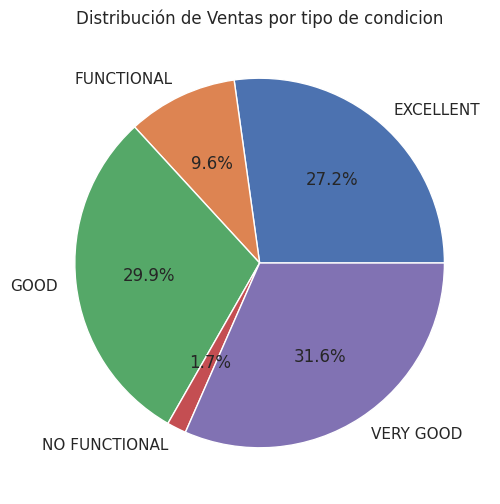

In [ ]:
#Analisis de ventas totales por condición
Carro = df_autos.groupby("CONDICION")['PRECIO_DE_VENTA'].sum().reset_index()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(Carro['PRECIO_DE_VENTA'], labels = Carro['CONDICION'], autopct='%1.1f%%')
# Ajustes adicionales
ax.set_title('Distribución de Ventas por tipo de condicion')

# Mostrar el gráfico
plt.show()

<ipython-input-91-f40adbbc64d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(df_autos, x="PRECIO_DE_VENTA", y="CONDICION", palette="Set1")


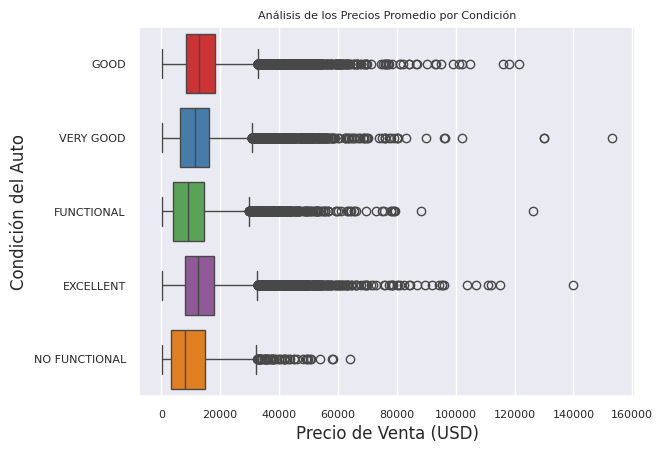

In [ ]:
# Analisis de los precios promedio por condicion, con identificacion de outliers
ax = sns.boxplot(df_autos, x="PRECIO_DE_VENTA", y="CONDICION", palette="Set1")

# Modificar el tamaño de la letra de los ejes
ax.set_title("Análisis de los Precios Promedio por Condición", fontsize=8)
ax.set_xlabel("Precio de Venta (USD)", fontsize=12)
ax.set_ylabel("Condición del Auto", fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()


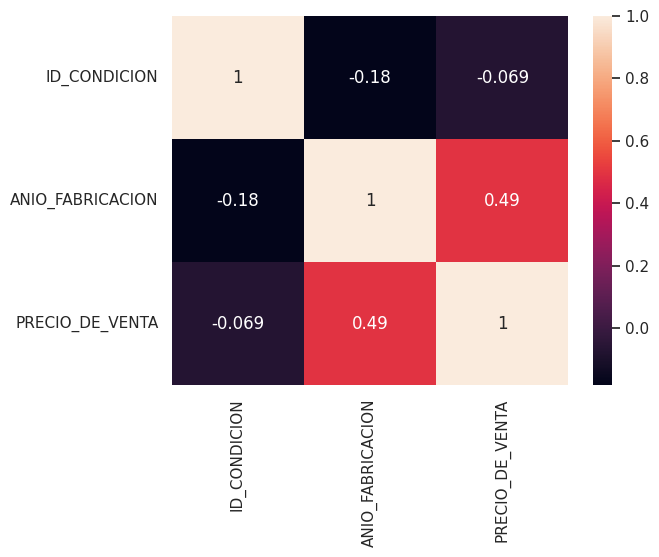

In [ ]:
#Correlacion entre Condicion (ID), Año de fabricacion, y el precio.

sns.heatmap(df_autos[["ID_CONDICION","ANIO_FABRICACION","PRECIO_DE_VENTA"]].corr(), annot=True);

**3.- Existen ciertas marcas y modelos que pese a su antigüedad y condición podrían mantener un alto valor (outliers a considerar en el modelo)?**

<Axes: xlabel='ANIO_FABRICACION', ylabel='PRECIO_DE_VENTA'>

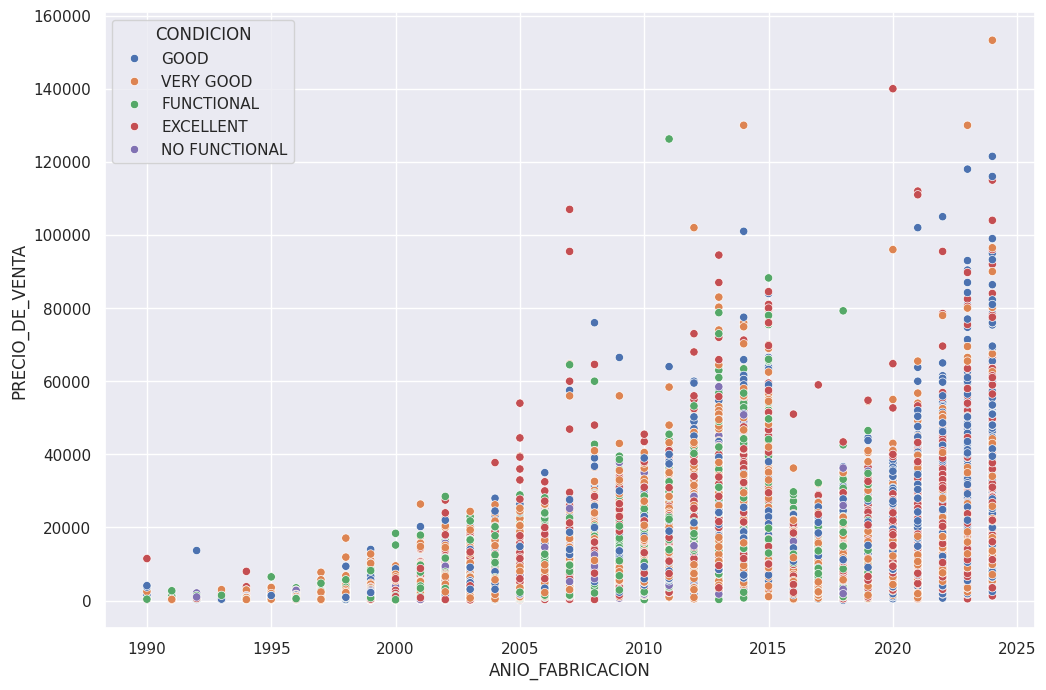

In [ ]:
#correlacion entre año de fabricacion y precio de ventas

f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df_autos, x="ANIO_FABRICACION", y="PRECIO_DE_VENTA", hue="CONDICION", ax=ax)



In [ ]:
#Identificaremos los modelos mas caros que generan los outliers
# Ordenar por PRECIO_DE_VENTA y obtener las 10 filas más caras como ejempli, incluyendo todos los detalles
top_10_detalles = df_autos.sort_values(by='PRECIO_DE_VENTA', ascending=False).head(10)

# Mostrar los detalles de los 10 modelos más caros
print(top_10_detalles[['MARCA', 'PRECIO_DE_VENTA', 'CONDICION', 'ANIO_FABRICACION']])

                 MODELO  PRECIO_DE_VENTA   CONDICION  ANIO_FABRICACION
134931      Flying Spur           153250   VERY GOOD              2024
149377            Ghost           140000   EXCELLENT              2020
41275   Continental GTC           130000   VERY GOOD              2023
138304              911           130000   VERY GOOD              2014
156004          SLS AMG           126250  FUNCTIONAL              2011
157893          G-Class           121500        GOOD              2024
87094           G-Class           118000        GOOD              2023
43067       Range Rover           116000        GOOD              2024
32252       Range Rover           115000   EXCELLENT              2024
12266                R8           112000   EXCELLENT              2021


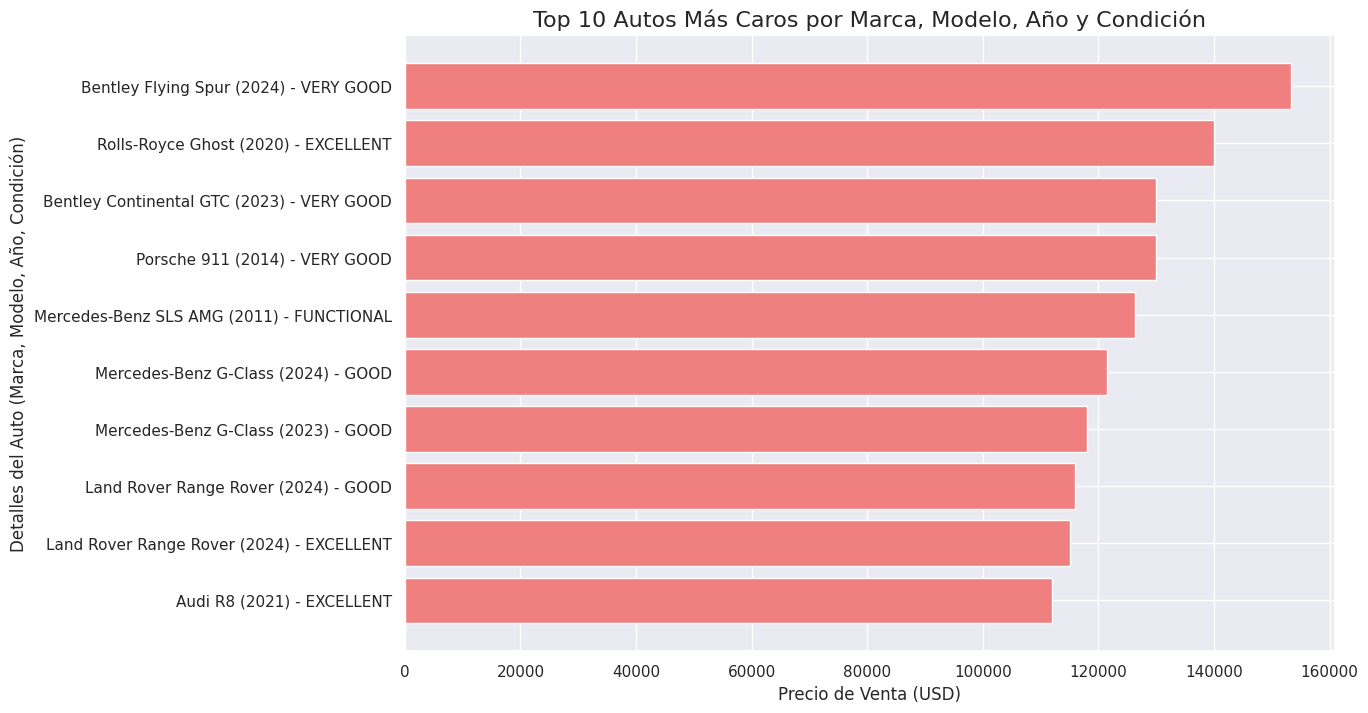

In [ ]:
# Crear una nueva columna que combine MARCA, MODELO, AÑO DE FABRICACIÓN y CONDICIÓN
df_autos['DETALLES_AUTO'] = (df_autos['MARCA'].astype(str) + ' ' + df_autos['MODELO'].astype(str) +
                       ' (' + df_autos['ANIO_FABRICACION'].astype(str) + ') - ' +
                       df_autos['CONDICION'].astype(str))

# Agrupar por la nueva columna 'DETALLES_AUTO' y obtener el precio más alto para cada uno
top_10_autos_caros = df_autos.groupby('DETALLES_AUTO')['PRECIO_DE_VENTA'].max().nlargest(10).reset_index()

# Definir los ejes
eje_x = top_10_autos_caros['PRECIO_DE_VENTA']
eje_y = top_10_autos_caros['DETALLES_AUTO']

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
plt.barh(eje_y, eje_x, color='lightcoral')

# Añadir títulos y etiquetas
plt.title('Top 10 Autos Más Caros por Marca, Modelo, Año y Condición', fontsize=16)
plt.xlabel('Precio de Venta (USD)', fontsize=12)
plt.ylabel('Detalles del Auto (Marca, Modelo, Año, Condición)', fontsize=12)

# Invertir el eje Y para mostrar el más caro en la parte superior
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

In [ ]:
#4 En ciertos estados con mayor poder adquisitivo, se adquieren unidades mas costosas?

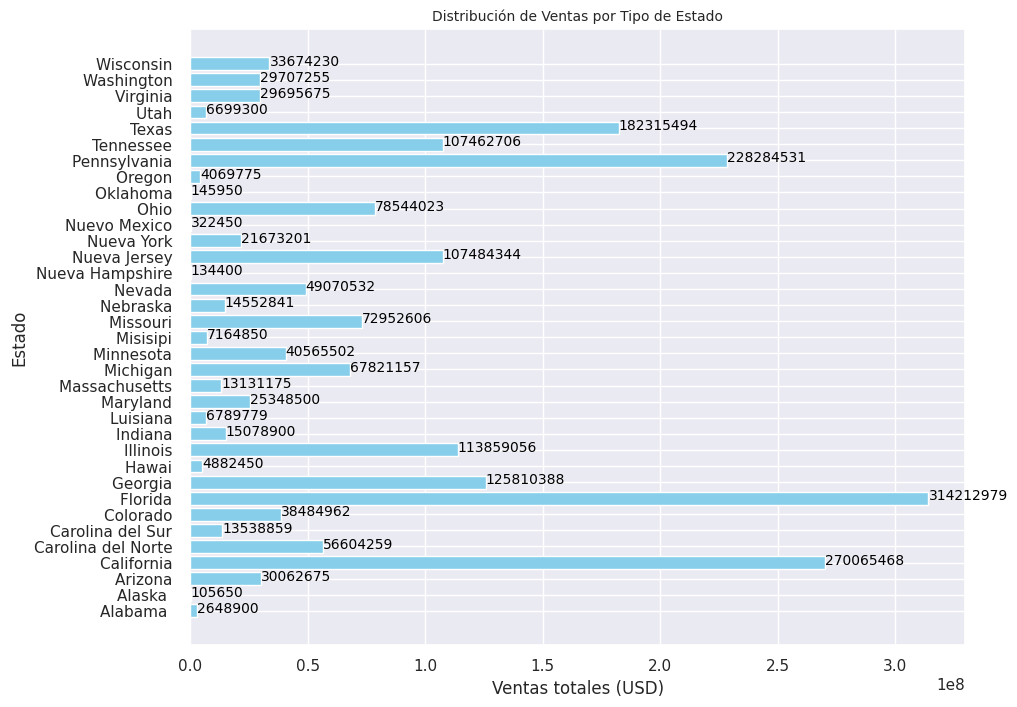

In [ ]:
#Analisis de ventas totales por Estado
Carro = df_autos.groupby("ESTADO")['PRECIO_DE_VENTA'].sum().reset_index()

# Crear el gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(Carro['ESTADO'], Carro['PRECIO_DE_VENTA'], color='skyblue')

# Ajustes adicionales
ax.set_title('Distribución de Ventas por Tipo de Estado', fontsize=10)
ax.set_xlabel('Ventas totales (USD)', fontsize=12)
ax.set_ylabel('Estado', fontsize=12)

# Añadir etiquetas de valores en las barras
for i in ax.patches:
    ax.text(i.get_width() + 1000, i.get_y() + 0.3,
            str(round(i.get_width(), 2)),
            fontsize=10, color='black')

# Mostrar el gráfico
plt.show()

In [ ]:
#Analisis de precios promedio por Estado

<ipython-input-92-d4d043566a67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(df_autos, x="PRECIO_DE_VENTA", y="ESTADO", palette="Set1")


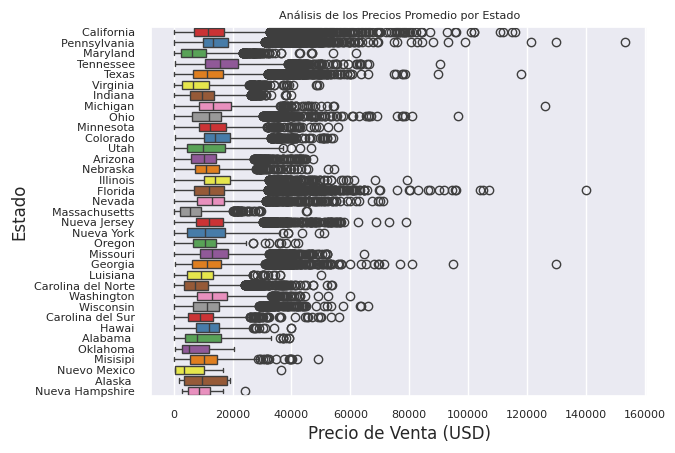

In [ ]:
# Analisis de los precios promedio por condicion, con identificacion de outliers
ax = sns.boxplot(df_autos, x="PRECIO_DE_VENTA", y="ESTADO", palette="Set1")

# Modificar el tamaño de la letra de los ejes
ax.set_title("Análisis de los Precios Promedio por Estado", fontsize=8)
ax.set_xlabel("Precio de Venta (USD)", fontsize=12)
ax.set_ylabel("Estado", fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

**5.- Los sujetos masculinos y de mayor edad compran autos más costosos?**

In [ ]:
# Venta de Unidades por Genero

In [ ]:
#Definir los ejes
eje_x = df_autos['SEXO'].unique()  # Eje X: los valores únicos de la columna 'SEXO'
eje_y = df_autos.groupby("SEXO")["PRECIO_DE_VENTA"].sum()  # Eje Y: suma de 'PRECIO_DE_VENTA' por 'SEXO'

Text(0, 0.5, 'Ventas en MM USD')

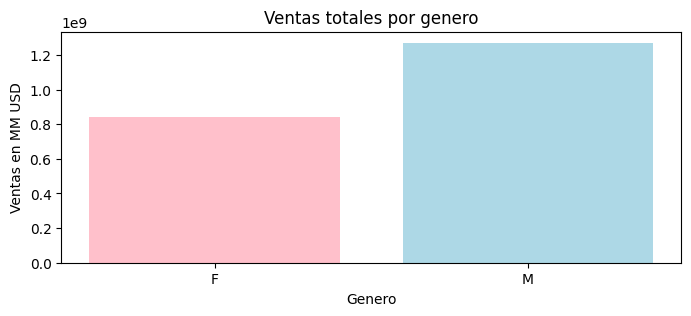

In [ ]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 3))

# Personalizar el gráfico
ax.bar(eje_x, eje_y, color=["pink", "lightblue"])
ax.set_title('Ventas totales por genero')
ax.set_xticks(eje_x)
ax.set_xlabel('Genero')
ax.set_ylabel('Ventas en MM USD')

In [ ]:
# Ventas por rango de edad

Text(0, 0.5, 'Cantidad de Compradores')

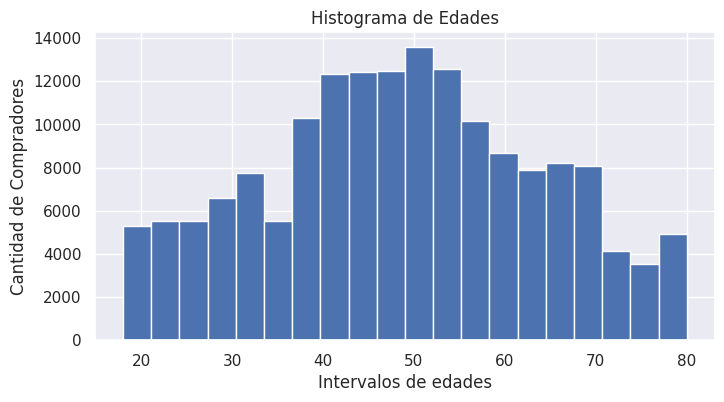

In [ ]:

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_autos['EDAD'], bins=20)

# Personalizar el gráfico
ax.set_title('Histograma de Edades')
ax.set_xlabel('Intervalos de edades')
ax.set_ylabel('Cantidad de Compradores')

In [ ]:
# Precio pagado por edad y por sexo

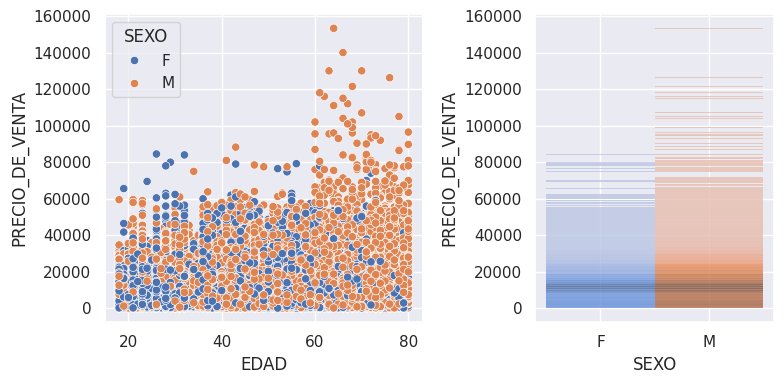

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df_autos, x="EDAD", y="PRECIO_DE_VENTA", hue="SEXO", ax=axs[0])
sns.histplot(data=df_autos, x="SEXO", y="PRECIO_DE_VENTA",hue="SEXO", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

**Conclusiones del EDA**: insights y recomendaciones

El análisis de las variables demográficas, como la edad y el sexo, indica que existe una relación predominante con la demanda (cantidad) y, en menor medida, con el precio de venta. Sin embargo, se identificaron correlaciones más fuertes en determinadas variables.

El estudio del rango intercuartil del precio de las unidades revela que, efectivamente, los vehículos más modernos se valoran a precios más altos, siempre que no presenten un alto kilometraje.

En cuanto a las condiciones de las unidades, se observó que las clasificaciones "Excelente" y "Muy Bien" son las más demandadas en cantidad; no obstante, los promedios de precios no parecen verse afectados significativamente por la condición de los vehículos.

Es importante señalar que en todas las métricas analizadas se identificó una gran cantidad de valores atípicos, ya que marcas como Lamborghini, Mercedes, Rolls Royce y Bentley mantienen su valor, a pesar de su antigüedad o condición.

Por otro lado, se identificó que en estados con mayor poder adquisitivo, como California, Pennsylvania y Tennessee, se adquieren unidades con un valor promedio más alto. En contraste, Florida, aunque presenta el mayor volumen de ventas, muestra un promedio de precios más bajo, salvo algunas excepciones de valores atípicos.

Adicionalmente, se inferió que la población masculina, además de ser la que más vehículos consume, también es la que adquiere las unidades más costosas. Asimismo, se observó que el rango etario con mayor consumo de autos de lujo se encuentra entre los 60 y 80 años.

Como conclusión final, se recomienda orientar las campañas de venta hacia el público masculino de la tercera edad, dado que son los principales consumidores del mercado y, según los datos, están más dispuestos a pagar precios más altos.



# **Preprocesamiento de datos**

**Codificación de variables categóricas**

In [ ]:
#Traemos todas las variables para ver cuales son categoricas

In [ ]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165576 entries, 0 to 165575
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FACTURA           165576 non-null  int64         
 1   NUMERO_CHASIS     165576 non-null  int64         
 2   ID_MODELO         165576 non-null  int64         
 3   MARCA             165576 non-null  object        
 4   MODELO            165576 non-null  object        
 5   LINEA             165576 non-null  object        
 6   ID_CARROCERIA     165576 non-null  int64         
 7   CARROCERIA        165576 non-null  object        
 8   ID_TRANSMISION    165576 non-null  int64         
 9   TRANSMISION       165576 non-null  object        
 10  ID_CONDICION      165576 non-null  int64         
 11  CONDICION         165576 non-null  object        
 12  ID_COLOR          165576 non-null  int64         
 13  COLOR_EXT         165576 non-null  object        
 14  KILO

In [ ]:
#Suprimir las variables categoricas, variables que hayan generado muchos valores outliers, o datos que no sumen inforacion util para el modelado:

DF_Modelado_0 = df_autos.drop(['ID_MODELO', 'ID_ESTADO', 'MODELO', 'TRANSMISION', 'ID_CONDICION', 'LINEA', 'COLOR_EXT', 'SUCURSAL', 'ABREVIATURA', 'FACTURA', 'NUMERO_CHASIS', 'ID_SUCURSAL','FECHA_DE_VENTA', 'ID_COMPADOR', 'ID_CARROCERIA', 'ID_TRANSMISION', 'ID_COLOR', 'ESTADO', 'MARCA', 'CARROCERIA'], axis=1)

In [ ]:
#Posteriormente, codificamos las variables categoricas valiosas para el modelo
DF_Modelado = pd.get_dummies(DF_Modelado_0, columns=['CONDICION', 'SEXO'])

In [ ]:
DF_Modelado_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165576 entries, 0 to 165575
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CONDICION         165576 non-null  object
 1   KILOMETRAJE       165576 non-null  int64 
 2   ANIO_FABRICACION  165576 non-null  int64 
 3   SEXO              165576 non-null  object
 4   EDAD              165576 non-null  int64 
 5   PRECIO_DE_VENTA   165576 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 7.6+ MB


In [ ]:
DF_Modelado_0.head()

,CONDICION,KILOMETRAJE,ANIO_FABRICACION,SEXO,EDAD,PRECIO_DE_VENTA
0,GOOD,16639,2015,F,18,21500
1,VERY GOOD,9393,2015,F,63,21500
2,FUNCTIONAL,5554,2015,M,62,10900
3,GOOD,14414,2024,M,78,49750
4,FUNCTIONAL,11398,2015,M,48,14100


#**Feature Selection**

**Selección de variable objetivo y variables independientes**

In [ ]:
X = DF_Modelado.drop(['PRECIO_DE_VENTA' ], axis=1)
y = DF_Modelado['PRECIO_DE_VENTA']


In [ ]:
# Variables independientes
X.columns

Index(['KILOMETRAJE', 'ANIO_FABRICACION', 'EDAD', 'CARROCERIA_Convertible',
       'CARROCERIA_Coupe', 'CARROCERIA_Double Cab', 'CARROCERIA_Hatchback',
       'CARROCERIA_SUV', 'CARROCERIA_Sedan', 'CARROCERIA_SuperCrew',
       ...
       'MARCA_Saab', 'MARCA_Saturn', 'MARCA_Scion', 'MARCA_Smart',
       'MARCA_Subaru', 'MARCA_Suzuki', 'MARCA_Tesla', 'MARCA_Toyota',
       'MARCA_Volkswagen', 'MARCA_Volvo'],
      dtype='object', length=106)

In [ ]:
# Variable dependiente
y.sample(10)

,PRECIO_DE_VENTA
148788,16600
122019,9401
157820,30300
73542,14800
94238,6800
127701,11500
131040,11800
148330,4600
1276,8000
150831,8600


# **Modelado**

**Librerias necesarias para implementar los modelos**

In [ ]:
from sklearn.linear_model import LinearRegression as LN
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

## **Modelado Simple*

### **1.-Regresion Lineal**

**División de datos en conjuntos de entrenamiento y prueba**

In [ ]:
# Defino datos de entrenamiento (70%) y datos de prueba(30%) .
# Random_state:Establecemo una semilla de múmeros aleatorios que asegura que el código sea reproducible cada vez que lo corra (42).
# shuffle=True: Mezcla el orden de los datos para evitar sesgos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

**Predicción con conjunto de prueba**

In [ ]:
# Creo el objeto de regresión logistica.
model = LinearRegression()

# Entreno el modelo con mis datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

**Evaluación del rendimiento del modelo**

In [ ]:
# Evaluar el modelo
mse_rl = mean_squared_error(y_test, y_pred)
r2_rl = r2_score(y_test, y_pred)
rmse_rl = np.sqrt(mse_rl)
mae_rl = mean_absolute_error(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse_rl}')
print(f'Coeficiente de determinación (R^2): {r2_rl}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_rl}')
print(f'Error Absoluto Medio (MAE): {mae_rl}')

Error cuadrático medio (MSE): 26497300.591009215
Coeficiente de determinación (R^2): 0.6268315741094972
Raíz del Error Cuadrático Medio (RMSE): 5147.552874037256
Error Absoluto Medio (MAE): 3459.763626182284


### **2.-KNN**

**Predicción con conjunto de prueba**

In [ ]:
#instacionamos el modelo
model = KNN(n_neighbors=20, weights="uniform",metric="manhattan")

In [ ]:
#entrenamos el modelo
model.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=20)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

**Evaluación del rendimiento del modelo**

In [ ]:
# Evaluar el modelo
mse_knn = mean_squared_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse_knn}')
print(f'Coeficiente de determinación (R^2): {r2_knn}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_knn}')
print(f'Error Absoluto Medio (MAE): {mae_knn}')

Error cuadrático medio (MSE): 40883772.32059503
Coeficiente de determinación (R^2): 0.42422312382572114
Raíz del Error Cuadrático Medio (RMSE): 6394.041939227099
Error Absoluto Medio (MAE): 4423.848727679021


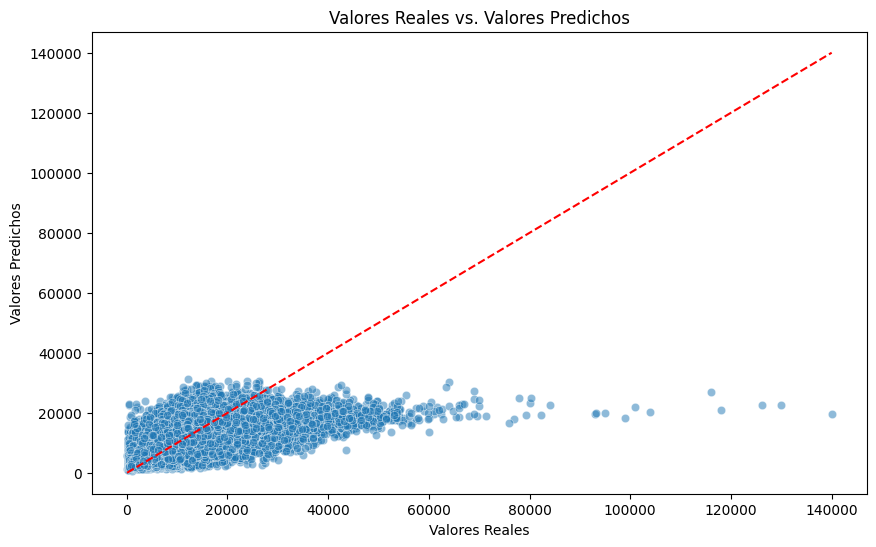

In [ ]:
# Gráfico de dispersión de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

### **3.-Ramdom Forest**

**Predicción con conjunto de prueba**

In [ ]:
#instacionamos el modelo
model = RF(n_estimators=10, random_state=42)

In [ ]:
#entrenamos el modelo
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

**Evaluación del rendimiento del modelo**

In [ ]:
# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse_rf}')
print(f'Coeficiente de determinación (R^2): {r2_rf}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_rf}')
print(f'Error Absoluto Medio (MAE): {mae_rf}')

Error cuadrático medio (MSE): 17657459.765154913
Coeficiente de determinación (R^2): 0.7513253682896466
Raíz del Error Cuadrático Medio (RMSE): 4202.078029398658
Error Absoluto Medio (MAE): 2608.6406417973544


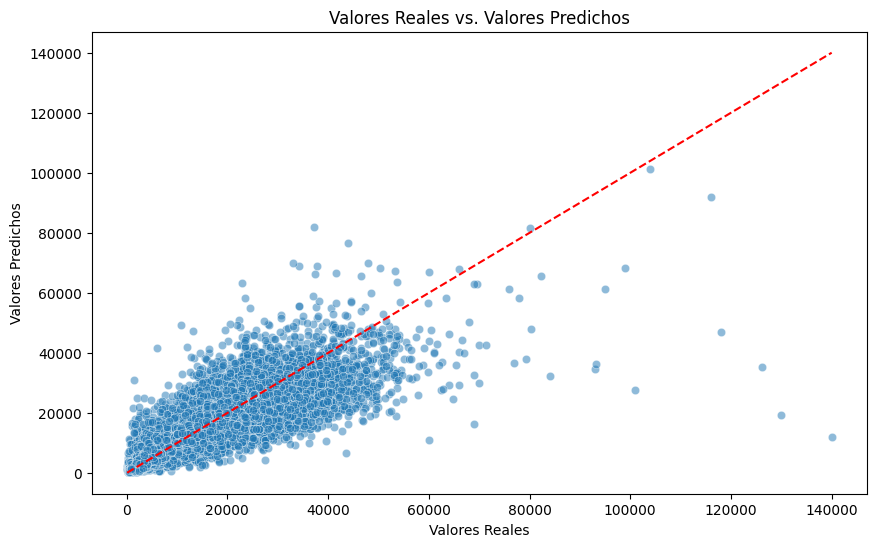

In [ ]:
# Gráfico de dispersión de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

### **Conclusiones de modelado simple**

In [ ]:
#REDONDEO VALORES DE LA METRICA PARA COMPARAR SU PORCENTAJE DE EFICACIA

In [ ]:
print(f'RESULTADO REGRESION LINEAL: {r2_rl*100//1}%')
print(f'RESULTADO KNN: {r2_knn*100//1}%')
print(f'RESULTADO RANDOM FOREST: {r2_rf*100//1}%')

RESULTADO REGRESION LINEAL: 62.0%
RESULTADO KNN: 42.0%
RESULTADO RANDOM FOREST: 75.0%


A través del análisis comparativo, se ha determinado que el algoritmo **Random Forest** es el más eficaz para predecir el precio de los automóviles basándose en los atributos de cada unidad, alcanzando un **75%** de precisión. Este resultado se obtuvo tras un exhaustivo análisis exploratorio del conjunto de datos, donde se descartaron variables que no mostraban una relación directa con la variable objetivo, "precio de venta", mediante el uso de gráficos de correlación y otras métricas.

Además, la eliminación de outliers, ajustada mediante un proceso iterativo, contribuyó significativamente a la reducción de la dimensionalidad del dataset y mejoró el rendimiento del algoritmo predictivo. Finalmente, tras probar diversos algoritmos y técnicas, se concluye que **Random Forest** es el que mejor se adapta a la estructura del dataset, como lo demuestran los resultados obtenidos.

## **Customizacion de hiperparametros para mejora de Modelos*

In [ ]:
#Selección de variable objetivo y variables independientes

In [ ]:
X = DF_Modelado_0.drop(['PRECIO_DE_VENTA' ], axis=1)
y = DF_Modelado_0['PRECIO_DE_VENTA']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#categorizo variables numericas y categoricas

In [ ]:
lista_numeric_features = DF_Modelado_0.select_dtypes(include=['int64', 'float64']).drop(['PRECIO_DE_VENTA' ], axis=1).columns
lista_categorical_features = DF_Modelado_0.select_dtypes(include=['object']).columns

In [ ]:
#Importo librerias necesarias para Hipertunning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
#creamos los transformadores por separado en dos pipelines

In [ ]:
#para variables numericas

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [ ]:
#para variables categoricas

In [ ]:
categorical_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='most_frequent')),
      ('onehot', OneHotEncoder())])

In [ ]:
#creo un solo pipeline con un trasformador de columnas y que unifique los dos pipe anteriores

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, lista_numeric_features),
        ('cat', categorical_transformer, lista_categorical_features)])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['KILOMETRAJE', 'ANIO_FABRICACION', 'EDAD'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 Index(['CONDICION', 'SEXO'], dtype='object'))])

In [ ]:
X_train_prepro=preprocessor.fit_transform(X_train)

### **RAMDOM GRID SEARCH**

In [ ]:
# Creo el pipe1 con el Preprocessor creado

In [ ]:
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ])

In [ ]:
#Fiteo el Pipe 1

In [ ]:
pipe1.fit(X_train, y_train);

In [ ]:
# Vamos a probar 3 los modelos con dos hiperparamentros diferentes y tres estrategias de imputacion diferentes

In [ ]:
params_grid = [

               {
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator':[LN()],

                },

               {
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator':[KNN()],
                'estimator__n_neighbors': [ 3, 5, 7 ],

                },


               {
                'estimator': [RF()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator__n_estimators': [ 200, 300, 500],
                'estimator__max_depth': [5, 7, 9]

                }

              ]

In [ ]:
#Ejecuto el pipe sobre un algoritmo para usar posteriormente el GS

In [ ]:
pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('estimator', LN())])

In [ ]:
#Ejecuto Random GS para los 3 algoritmos

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid_cv = RandomizedSearchCV(pipe2, params_grid, n_iter=10)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)

Mejores parametros {'preprocessor__num__imputer__strategy': 'mean', 'estimator__n_estimators': 300, 'estimator__max_depth': 9, 'estimator': RandomForestRegressor()}
Mejor score de CV 0.4839294370209273


### **Conclusiones sobre modelo optimizado**

En función del tamaño del dataset y el tiempo requerido, se optó por utilizar Randomized Grid Search en lugar de Grid Search, ya que este último resultaba demasiado costoso en términos computacionales. Sin embargo, los resultados del algoritmo optimizado (R² = 0.48) fueron inferiores a los del modelo base (R² = 0.75). Esto podría deberse a la naturaleza aleatoria de la búsqueda de hiperparámetros en Randomized Grid Search, lo que sugiere que los hiperparámetros seleccionados no representaron una configuración óptima para este caso en particular.